In [1]:
from datasets import LungDataset
from densenet import DenseNet
import utils

from torchvision import transforms

In [2]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((150, 150), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

dataloader_args = {
    'dataset'        : LungDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
    'shuffle'        : True,
}

In [3]:
# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 16,
    'block_config'      : (4, 8, 16, 12),
    'num_init_features' : 32,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 3,
}

In [4]:
# Define training arguments
def lr_scheduler(epoch, learning_rate):
    if epoch % 20 == 0:
        learning_rate /= 10
    return learning_rate

training_args = {
    'device'       :'cuda',
    'epochs'       : 50,
    'optimizer'    : 'Adam',
    'learning_rate': 0.01,
    'lr_scheduler' : lr_scheduler,
    'save_interval': 30,
    'model_path'   : './models/three-class-classifier.pt',
    'history_path' : './history/three-class-classifier.pickle',
}

In [5]:
# Create data loaders
train_loader, test_loader, val_loader = utils.get_dataloaders(**dataloader_args)

In [6]:
# Instantiate model
model = DenseNet(**model_args)

In [7]:
# Carry out training on the model
history = utils.train_model(model, train_loader, test_loader, **training_args)

[Sun Mar 21 14:53:39 2021] Training started



[Sun Mar 21 14:53:56 2021] Time elapsed: 0:17 - loss: 0.968 - acc: 0.713 - recall: 0.491 - f1: 0.441 - test_loss: 1.116 - test_acc: 0.651 - test_recall: 0.404 - test_f1: 0.320



[Sun Mar 21 14:54:14 2021] Time elapsed: 0:35 - loss: 0.860 - acc: 0.742 - recall: 0.539 - f1: 0.486 - test_loss: 1.048 - test_acc: 0.751 - test_recall: 0.553 - test_f1: 0.522



[Sun Mar 21 14:54:31 2021] Time elapsed: 0:52 - loss: 0.838 - acc: 0.750 - recall: 0.554 - f1: 0.505 - test_loss: 0.992 - test_acc: 0.697 - test_recall: 0.472 - test_f1: 0.422



[Sun Mar 21 14:54:50 2021] Time elapsed: 1:11 - loss: 0.801 - acc: 0.757 - recall: 0.575 - f1: 0.530 - test_loss: 0.924 - test_acc: 0.699 - test_recall: 0.478 - test_f1: 0.408



[Sun Mar 21 14:55:07 2021] Time elapsed: 1:28 - loss: 0.791 - acc: 0.762 - recall: 0.581 - f1: 0.535 - test_loss: 0.899 - test_acc: 0.732 - test_recall: 0.595 - test_f1: 0.570



[Sun Mar 21 14:55:25 2021] Time elapsed: 1:46 - loss: 0.795 - acc: 0.761 - recall: 0.585 - f1: 0.549 - test_loss: 0.710 - test_acc: 0.823 - test_recall: 0.702 - test_f1: 0.695



[Sun Mar 21 14:55:42 2021] Time elapsed: 2:03 - loss: 0.772 - acc: 0.773 - recall: 0.603 - f1: 0.571 - test_loss: 1.066 - test_acc: 0.718 - test_recall: 0.539 - test_f1: 0.510



[Sun Mar 21 14:56:00 2021] Time elapsed: 2:21 - loss: 0.764 - acc: 0.770 - recall: 0.608 - f1: 0.583 - test_loss: 0.856 - test_acc: 0.736 - test_recall: 0.623 - test_f1: 0.591



[Sun Mar 21 14:56:16 2021] Time elapsed: 2:37 - loss: 0.738 - acc: 0.784 - recall: 0.632 - f1: 0.610 - test_loss: 0.789 - test_acc: 0.811 - test_recall: 0.695 - test_f1: 0.688



[Sun Mar 21 14:56:33 2021] Time elapsed: 2:54 - loss: 0.758 - acc: 0.779 - recall: 0.624 - f1: 0.601 - test_loss: 0.748 - test_acc: 0.804 - test_recall: 0.692 - test_f1: 0.689



[Sun Mar 21 14:56:50 2021] Time elapsed: 3:11 - loss: 0.731 - acc: 0.782 - recall: 0.626 - f1: 0.598 - test_loss: 1.355 - test_acc: 0.740 - test_recall: 0.529 - test_f1: 0.470



[Sun Mar 21 14:57:11 2021] Time elapsed: 3:31 - loss: 0.718 - acc: 0.786 - recall: 0.639 - f1: 0.618 - test_loss: 0.816 - test_acc: 0.787 - test_recall: 0.626 - test_f1: 0.623



[Sun Mar 21 14:57:28 2021] Time elapsed: 3:49 - loss: 0.724 - acc: 0.791 - recall: 0.646 - f1: 0.630 - test_loss: 0.795 - test_acc: 0.780 - test_recall: 0.649 - test_f1: 0.642



[Sun Mar 21 14:57:45 2021] Time elapsed: 4:06 - loss: 0.706 - acc: 0.795 - recall: 0.650 - f1: 0.634 - test_loss: 0.680 - test_acc: 0.820 - test_recall: 0.672 - test_f1: 0.670



[Sun Mar 21 14:58:01 2021] Time elapsed: 4:22 - loss: 0.693 - acc: 0.797 - recall: 0.655 - f1: 0.638 - test_loss: 0.622 - test_acc: 0.846 - test_recall: 0.741 - test_f1: 0.743



[Sun Mar 21 14:58:19 2021] Time elapsed: 4:40 - loss: 0.691 - acc: 0.797 - recall: 0.659 - f1: 0.643 - test_loss: 0.745 - test_acc: 0.791 - test_recall: 0.593 - test_f1: 0.515



[Sun Mar 21 14:58:36 2021] Time elapsed: 4:57 - loss: 0.681 - acc: 0.800 - recall: 0.662 - f1: 0.645 - test_loss: 1.893 - test_acc: 0.730 - test_recall: 0.518 - test_f1: 0.447



[Sun Mar 21 14:58:53 2021] Time elapsed: 5:14 - loss: 0.672 - acc: 0.800 - recall: 0.665 - f1: 0.647 - test_loss: 2.091 - test_acc: 0.688 - test_recall: 0.465 - test_f1: 0.391



[Sun Mar 21 14:59:10 2021] Time elapsed: 5:31 - loss: 0.657 - acc: 0.809 - recall: 0.680 - f1: 0.667 - test_loss: 1.634 - test_acc: 0.748 - test_recall: 0.540 - test_f1: 0.473



[Sun Mar 21 14:59:27 2021] Time elapsed: 5:48 - loss: 0.640 - acc: 0.812 - recall: 0.675 - f1: 0.659 - test_loss: 0.537 - test_acc: 0.896 - test_recall: 0.830 - test_f1: 0.827



[Sun Mar 21 14:59:44 2021] Time elapsed: 6:05 - loss: 0.629 - acc: 0.818 - recall: 0.692 - f1: 0.682 - test_loss: 0.514 - test_acc: 0.882 - test_recall: 0.796 - test_f1: 0.793



[Sun Mar 21 15:00:02 2021] Time elapsed: 6:23 - loss: 0.619 - acc: 0.822 - recall: 0.700 - f1: 0.689 - test_loss: 0.521 - test_acc: 0.894 - test_recall: 0.825 - test_f1: 0.819



[Sun Mar 21 15:00:19 2021] Time elapsed: 6:40 - loss: 0.604 - acc: 0.829 - recall: 0.709 - f1: 0.698 - test_loss: 0.546 - test_acc: 0.884 - test_recall: 0.819 - test_f1: 0.809



[Sun Mar 21 15:00:36 2021] Time elapsed: 6:57 - loss: 0.604 - acc: 0.831 - recall: 0.713 - f1: 0.705 - test_loss: 0.584 - test_acc: 0.886 - test_recall: 0.815 - test_f1: 0.807



[Sun Mar 21 15:00:53 2021] Time elapsed: 7:14 - loss: 0.598 - acc: 0.831 - recall: 0.715 - f1: 0.706 - test_loss: 0.514 - test_acc: 0.881 - test_recall: 0.779 - test_f1: 0.788



[Sun Mar 21 15:01:11 2021] Time elapsed: 7:32 - loss: 0.599 - acc: 0.829 - recall: 0.712 - f1: 0.703 - test_loss: 0.636 - test_acc: 0.883 - test_recall: 0.813 - test_f1: 0.806



[Sun Mar 21 15:01:27 2021] Time elapsed: 7:48 - loss: 0.596 - acc: 0.831 - recall: 0.712 - f1: 0.704 - test_loss: 0.527 - test_acc: 0.894 - test_recall: 0.829 - test_f1: 0.822



[Sun Mar 21 15:01:44 2021] Time elapsed: 8:05 - loss: 0.595 - acc: 0.832 - recall: 0.716 - f1: 0.708 - test_loss: 0.515 - test_acc: 0.891 - test_recall: 0.811 - test_f1: 0.809



[Sun Mar 21 15:02:02 2021] Time elapsed: 8:23 - loss: 0.583 - acc: 0.834 - recall: 0.717 - f1: 0.709 - test_loss: 0.537 - test_acc: 0.889 - test_recall: 0.817 - test_f1: 0.811



[Sun Mar 21 15:02:20 2021] Time elapsed: 8:41 - loss: 0.588 - acc: 0.834 - recall: 0.718 - f1: 0.713 - test_loss: 0.548 - test_acc: 0.893 - test_recall: 0.813 - test_f1: 0.811



[Sun Mar 21 15:02:37 2021] Time elapsed: 8:58 - loss: 0.588 - acc: 0.832 - recall: 0.716 - f1: 0.707 - test_loss: 0.448 - test_acc: 0.902 - test_recall: 0.820 - test_f1: 0.825



[Sun Mar 21 15:02:54 2021] Time elapsed: 9:15 - loss: 0.591 - acc: 0.832 - recall: 0.716 - f1: 0.710 - test_loss: 0.494 - test_acc: 0.888 - test_recall: 0.797 - test_f1: 0.802



[Sun Mar 21 15:03:11 2021] Time elapsed: 9:32 - loss: 0.578 - acc: 0.835 - recall: 0.720 - f1: 0.709 - test_loss: 0.454 - test_acc: 0.898 - test_recall: 0.811 - test_f1: 0.817



[Sun Mar 21 15:03:28 2021] Time elapsed: 9:49 - loss: 0.575 - acc: 0.836 - recall: 0.722 - f1: 0.715 - test_loss: 0.590 - test_acc: 0.868 - test_recall: 0.766 - test_f1: 0.772



[Sun Mar 21 15:03:45 2021] Time elapsed: 10:06 - loss: 0.590 - acc: 0.833 - recall: 0.721 - f1: 0.711 - test_loss: 0.480 - test_acc: 0.904 - test_recall: 0.837 - test_f1: 0.835



[Sun Mar 21 15:04:01 2021] Time elapsed: 10:22 - loss: 0.582 - acc: 0.835 - recall: 0.722 - f1: 0.711 - test_loss: 0.475 - test_acc: 0.908 - test_recall: 0.849 - test_f1: 0.844



[Sun Mar 21 15:04:17 2021] Time elapsed: 10:37 - loss: 0.585 - acc: 0.832 - recall: 0.718 - f1: 0.708 - test_loss: 0.491 - test_acc: 0.903 - test_recall: 0.839 - test_f1: 0.832



[Sun Mar 21 15:04:31 2021] Time elapsed: 10:52 - loss: 0.575 - acc: 0.834 - recall: 0.722 - f1: 0.714 - test_loss: 0.458 - test_acc: 0.906 - test_recall: 0.848 - test_f1: 0.843



[Sun Mar 21 15:04:46 2021] Time elapsed: 11:07 - loss: 0.571 - acc: 0.837 - recall: 0.723 - f1: 0.716 - test_loss: 0.515 - test_acc: 0.902 - test_recall: 0.827 - test_f1: 0.821



[Sun Mar 21 15:05:00 2021] Time elapsed: 11:21 - loss: 0.551 - acc: 0.847 - recall: 0.738 - f1: 0.734 - test_loss: 0.474 - test_acc: 0.901 - test_recall: 0.826 - test_f1: 0.827



[Sun Mar 21 15:05:15 2021] Time elapsed: 11:36 - loss: 0.558 - acc: 0.840 - recall: 0.729 - f1: 0.722 - test_loss: 0.479 - test_acc: 0.901 - test_recall: 0.834 - test_f1: 0.832



[Sun Mar 21 15:05:30 2021] Time elapsed: 11:51 - loss: 0.543 - acc: 0.846 - recall: 0.737 - f1: 0.733 - test_loss: 0.467 - test_acc: 0.902 - test_recall: 0.835 - test_f1: 0.832



[Sun Mar 21 15:05:45 2021] Time elapsed: 12:06 - loss: 0.570 - acc: 0.843 - recall: 0.739 - f1: 0.732 - test_loss: 0.465 - test_acc: 0.902 - test_recall: 0.830 - test_f1: 0.830



[Sun Mar 21 15:06:00 2021] Time elapsed: 12:21 - loss: 0.563 - acc: 0.844 - recall: 0.736 - f1: 0.731 - test_loss: 0.450 - test_acc: 0.899 - test_recall: 0.824 - test_f1: 0.825



[Sun Mar 21 15:06:15 2021] Time elapsed: 12:36 - loss: 0.550 - acc: 0.842 - recall: 0.734 - f1: 0.727 - test_loss: 0.445 - test_acc: 0.904 - test_recall: 0.835 - test_f1: 0.833



[Sun Mar 21 15:06:31 2021] Time elapsed: 12:52 - loss: 0.566 - acc: 0.841 - recall: 0.731 - f1: 0.726 - test_loss: 0.461 - test_acc: 0.904 - test_recall: 0.841 - test_f1: 0.837



[Sun Mar 21 15:06:46 2021] Time elapsed: 13:07 - loss: 0.556 - acc: 0.839 - recall: 0.730 - f1: 0.723 - test_loss: 0.465 - test_acc: 0.901 - test_recall: 0.835 - test_f1: 0.830



[Sun Mar 21 15:07:01 2021] Time elapsed: 13:22 - loss: 0.555 - acc: 0.844 - recall: 0.738 - f1: 0.732 - test_loss: 0.454 - test_acc: 0.907 - test_recall: 0.837 - test_f1: 0.839



[Sun Mar 21 15:07:16 2021] Time elapsed: 13:37 - loss: 0.555 - acc: 0.842 - recall: 0.732 - f1: 0.724 - test_loss: 0.453 - test_acc: 0.904 - test_recall: 0.836 - test_f1: 0.835



[Sun Mar 21 15:07:30 2021] Time elapsed: 13:51 - loss: 0.554 - acc: 0.842 - recall: 0.732 - f1: 0.727 - test_loss: 0.463 - test_acc: 0.908 - test_recall: 0.841 - test_f1: 0.838

[Sun Mar 21 15:07:30 2021] Training complete - Time elapsed: 13:51


In [8]:
# Save the results of training
utils.save_model(model, training_args['model_path'])

utils.save_history(history, training_args['history_path'])

In [6]:
# Load the results of training
model = utils.load_model(training_args['model_path'])

history = utils.load_history(training_args['history_path'])

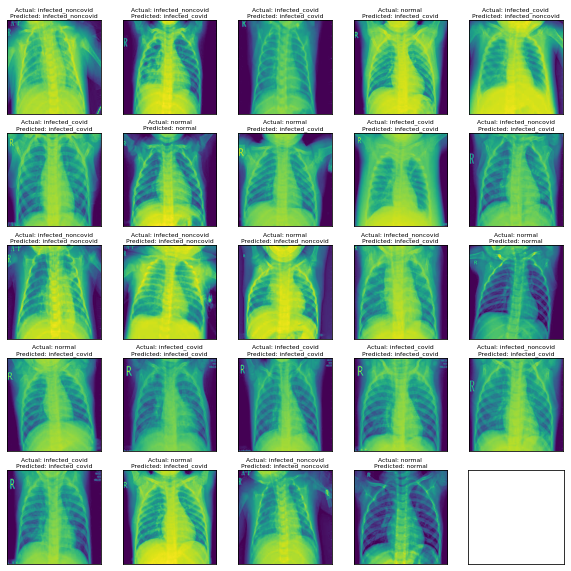

Validation loss: 1.072 - Validation accuracy: 0.722 - Validation F1-score: 0.575 - Validation recall: 0.583


In [7]:
# Evaluate the performance of the model on the validation set
model.to(training_args['device'])

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1_score']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")

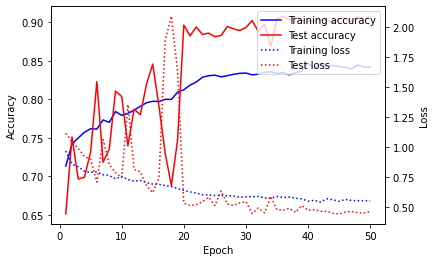

In [8]:
utils.plot_history(history, metric='accuracy')